In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r"/content/bbc-news-data.csv",sep='\t')

In [ ]:
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
df.shape

(2225, 4)

In [ ]:
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [ ]:
df.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Drop the Insignificant Features from the dataset**

In [ ]:
df.drop(["filename","content"],axis=1,inplace=True)

In [ ]:
df

,category,title
0,business,Ad sales boost Time Warner profit
1,business,Dollar gains on Greenspan speech
2,business,Yukos unit buyer faces loan claim
3,business,High fuel prices hit BA's profits
4,business,Pernod takeover talk lifts Domecq
...,...,...
2220,tech,BT program to beat dialler scams
2221,tech,Spam e-mails tempt net shoppers
2222,tech,Be careful how you code
2223,tech,US cyber security chief resigns


In [ ]:
df["category"].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
df['category_id'] = df['category'].factorize()[0]

In [ ]:
df

,category,title,category_id
0,business,Ad sales boost Time Warner profit,0
1,business,Dollar gains on Greenspan speech,0
2,business,Yukos unit buyer faces loan claim,0
3,business,High fuel prices hit BA's profits,0
4,business,Pernod takeover talk lifts Domecq,0
...,...,...,...
2220,tech,BT program to beat dialler scams,4
2221,tech,Spam e-mails tempt net shoppers,4
2222,tech,Be careful how you code,4
2223,tech,US cyber security chief resigns,4


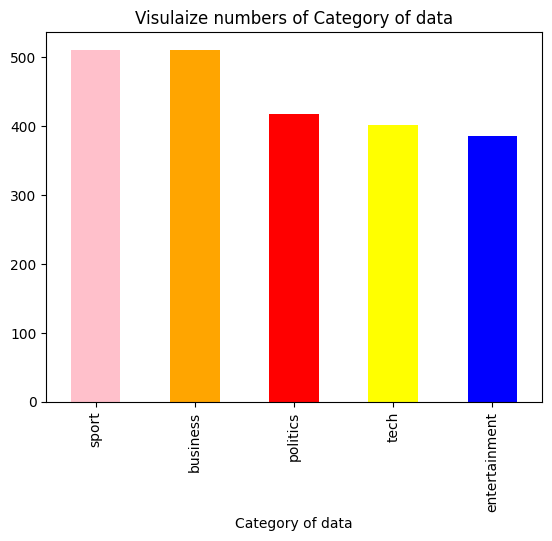

In [ ]:
df['category'].value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue","green","cyan"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

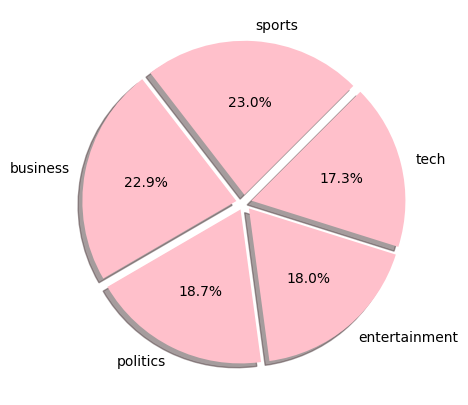

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = ["pink"]
pie = plt.pie(df["category_id"].value_counts(), labels = ['sports', 'business', 'politics', 'entertainment', 'tech'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
def wordcloud_draw(dataset,color='black'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()

    if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()

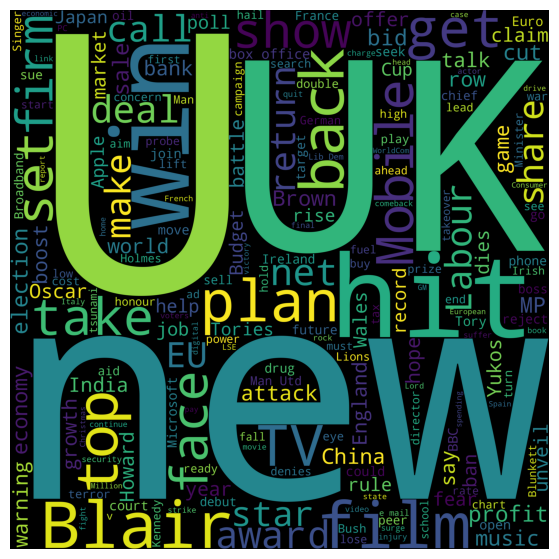

In [ ]:
wordcloud_draw(df["title"],color='black')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [256]:
class DataPreparation:
    def __init__(self, data, column='title'):
        self.df = data
        self.column = column

    def preprocess(self):
        self.tokenize()
        self.remove_stopwords()
        self.remove_non_words()
        self.stemming_words()

        return self.df

    def tokenize(self):
        self.df['clean_text'] = self.df[self.column].apply(nltk.word_tokenize)
        print("Tokenization is done.")

    def remove_stopwords(self):
        stopword_set = set(nltk.corpus.stopwords.words('english'))

        rem_stopword = lambda words: [item for item in words if item not in stopword_set]

        self.df['clean_text'] = self.df['clean_text'].apply(rem_stopword)
        print("Remove stopwords done.")

    def remove_non_words(self):
        """
            Remove all non alpha characters from the text data
            :numbers: 0-9
            :punctuation: All english punctuations
            :special characters: All english special characters
        """
        regpatrn = '[a-z]+'
        rem_special_chars = lambda x: [item for item in x if re.match(regpatrn, item)]
        self.df['clean_text'] = self.df['clean_text'].apply(rem_special_chars)
        print("Removed non english characters is done.")

    def stemming_words(self):
        ps = nltk.stem.PorterStemmer()

        on_word_stem= lambda x: [ps.stem(w) for w in x]

        self.df['clean_text'] = self.df['clean_text'].apply(on_word_stem)
        print("Stemming on the words.")

In [257]:
data_prep = DataPreparation(df)

cleanse_df = data_prep.preprocess()

Tokenization is done.
Remove stopwords done.
Removed non english characters is done.
Stemming on the words.


In [258]:
cleanse_df

,category,title,category_id,clean_text
0,business,ad sales boost time warner profit,0,"[ad, sale, boost, time, warner, profit]"
1,business,dollar gains greenspan speech,0,"[dollar, gain, greenspan, speech]"
2,business,yukos unit buyer faces loan claim,0,"[yuko, unit, buyer, face, loan, claim]"
3,business,high fuel prices hit bas profits,0,"[high, fuel, price, hit, ba, profit]"
4,business,pernod takeover talk lifts domecq,0,"[pernod, takeov, talk, lift, domecq]"
...,...,...,...,...
2220,tech,bt program beat dialler scams,4,"[bt, program, beat, dialler, scam]"
2221,tech,spam emails tempt net shoppers,4,"[spam, email, tempt, net, shopper]"
2222,tech,careful code,4,"[care, code]"
2223,tech,us cyber security chief resigns,4,"[us, cyber, secur, chief, resign]"


In [259]:
x=cleanse_df["title"]
y=cleanse_df["category_id"]

***LSTM MODEL***

In [260]:
max_len = 500 # The maximum length of the sequences
vocab_size = 10000 # The vocabulary size
embed_dim = 100 # The embedding dimension

In [261]:
tokenizer = Tokenizer(num_words=vocab_size)

In [262]:
tokenizer.fit_on_texts(x) # Fit the tokenizer on the training texts
X = tokenizer.texts_to_sequences(x) # Convert the training texts to sequences of integers
X = pad_sequences(X, maxlen=max_len) # Pad the training sequences to the maximum length


In [263]:
X

array([[   0,    0,    0, ...,  275,  963,  157],
       [   0,    0,    0, ...,  639, 1655,  964],
       [   0,    0,    0, ...,  100,  966,   76],
       ...,
       [   0,    0,    0, ...,    0, 3791,  757],
       [   0,    0,    0, ...,  128,  115,  867],
       [   0,    0,    0, ..., 3792,  180,  303]], dtype=int32)

In [264]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [265]:
X.shape,x_train.shape,x_test.shape

((2225, 500), (1780, 500), (445, 500))

In [266]:
voc_size=5000
model=Sequential()
model.add(Embedding(voc_size,100,input_length=max_len))
model.add(Dropout(0.3))
model.add(LSTM(150))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 500, 100)          500000    
                                                                 
 dropout_12 (Dropout)        (None, 500, 100)          0         
                                                                 
 lstm_15 (LSTM)              (None, 150)               150600    
                                                                 
 dropout_13 (Dropout)        (None, 150)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 650751 (2.48 MB)
Trainable params: 650751 (2.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [267]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
28/28 [==============================] - 46s 2s/step - loss: 0.0000e+00 - accuracy: 0.1758 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 2/10
28/28 [==============================] - 42s 2s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 3/10
28/28 [==============================] - 45s 2s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 4/10
28/28 [==============================] - 42s 2s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 5/10
28/28 [==============================] - 46s 2s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 6/10
28/28 [==============================] - 45s 2s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 7/10
28/28 [==============================] - 45s 2s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss

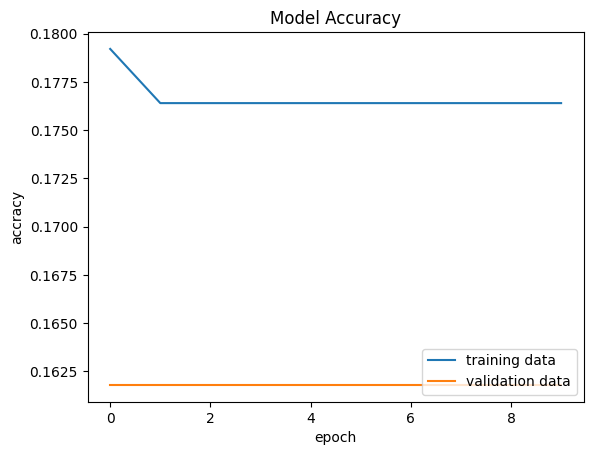

In [223]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accracy")
plt.xlabel("epoch")
plt.legend(['training data','validation data'],loc='lower right')


**Using Bidirectional In LSTM**

In [224]:
model1= tf.keras.Sequential([
        tf.keras.layers.Embedding(voc_size,100, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Dense(1, activation='softmax')
    ])
model1.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 100)          500000    
                                                                 
 dropout_10 (Dropout)        (None, 500, 100)          0         
                                                                 
 lstm_12 (LSTM)              (None, 150)               150600    
                                                                 
 dropout_11 (Dropout)        (None, 150)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 151       
                                                                 
Total params: 650751 (2.48 MB)
Trainable params: 650751 (2.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [225]:
history=model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
28/28 [==============================] - 43s 1s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 2/10
28/28 [==============================] - 34s 1s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 3/10
28/28 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 4/10
28/28 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 5/10
28/28 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 6/10
28/28 [==============================] - 30s 1s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss: 0.0000e+00 - val_accuracy: 0.1618
Epoch 7/10
28/28 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 0.1764 - val_loss

**OTHER MODELS BUILDING**

In [243]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,classification_report

In [229]:
# convert in lowercase
df['title']=df['title'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['title'].head()

0    ad sales boost time warner profit
1     dollar gains on greenspan speech
2    yukos unit buyer faces loan claim
3    high fuel prices hit ba's profits
4    pernod takeover talk lifts domecq
Name: title, dtype: object

In [230]:
#Remove punctuation marks
df['title']=df['title'].str.replace('[^\w\s]','')
df['title'].head()

0    ad sales boost time warner profit
1     dollar gains on greenspan speech
2    yukos unit buyer faces loan claim
3     high fuel prices hit bas profits
4    pernod takeover talk lifts domecq
Name: title, dtype: object

In [231]:
stop = set(stopwords.words('english'))
# removal of stopwords
df['title']=df['title'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df['title'].head()

0    ad sales boost time warner profit
1        dollar gains greenspan speech
2    yukos unit buyer faces loan claim
3     high fuel prices hit bas profits
4    pernod takeover talk lifts domecq
Name: title, dtype: object

In [232]:
#stemming
ps = PorterStemmer()
df['title'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))
df['title'].head()

0    ad sales boost time warner profit
1        dollar gains greenspan speech
2    yukos unit buyer faces loan claim
3     high fuel prices hit bas profits
4    pernod takeover talk lifts domecq
Name: title, dtype: object

In [233]:
x=df["title"]
y=df["category_id"]

In [234]:
vector=TfidfVectorizer()
X_vec=vector.fit_transform(x)

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X_vec,y,test_size=0.20,shuffle=True)

In [236]:
print(X_vec.shape,X_train.shape,X_test.shape)

(2225, 3785) (1780, 3785) (445, 3785)


In [237]:
models = {
    'Naive Bayes': MultinomialNB(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Perceptron': MLPClassifier(),
    'Random Forest':RandomForestClassifier()

}
params = {
    'Naive Bayes': {'alpha': [0.5, 1], 'fit_prior': [True, False] },
    'SVC' : {'kernel': ['linear', 'rbf']},
    'Decision Tree': {'min_samples_split': [1, 2, 5]},
    'Perceptron': {'alpha': [0.0001, 0.001], 'activation': ['tanh', 'relu']},
    'Random Forest':{'n_estimators':[1,5,10]}
}

In [238]:
for key in models.keys():
        model = models[key]
        param = params[key]

        gs = GridSearchCV(model, param, cv=5, error_score=0, refit=True)
        gs.fit(X_train, y_train)

        y_pred = gs.predict(X_test)

        print(key, ":")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \tF1-Score: %1.3f\t" % (accuracy_score(y_test, y_pred),
                                                                                     precision_score(y_test, y_pred, average='macro'),
                                                                                     recall_score(y_test, y_pred, average='macro'),
                                                                                     f1_score(y_test, y_pred, average='macro')))
        print('Best_params: ',gs.best_params_,"\n")

Naive Bayes :
Accuracy: 0.811 	Precision: 0.811 	Recall: 0.812 	F1-Score: 0.811	
Best_params:  {'alpha': 1, 'fit_prior': False} 

SVC :
Accuracy: 0.831 	Precision: 0.844 	Recall: 0.830 	F1-Score: 0.834	
Best_params:  {'kernel': 'linear'} 

Decision Tree :
Accuracy: 0.701 	Precision: 0.743 	Recall: 0.700 	F1-Score: 0.707	
Best_params:  {'min_samples_split': 2} 

Perceptron :
Accuracy: 0.829 	Precision: 0.828 	Recall: 0.828 	F1-Score: 0.828	
Best_params:  {'activation': 'relu', 'alpha': 0.0001} 

Random Forest :
Accuracy: 0.692 	Precision: 0.767 	Recall: 0.689 	F1-Score: 0.703	
Best_params:  {'n_estimators': 10} 



**SVM Clssifier Gives the better Result**

In [239]:
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [242]:
x_pred=clf.predict(X_train)
y_pred=clf.predict(X_test)

**Metric Evaluation**

In [244]:
confusion_matrix(y_train,x_pred)

array([[406,   1,   0,   1,   0],
       [  1, 308,   0,   0,   0],
       [  0,   0, 335,   0,   0],
       [  0,   0,   1, 416,   0],
       [  0,   2,   0,   0, 309]])

<Axes: >

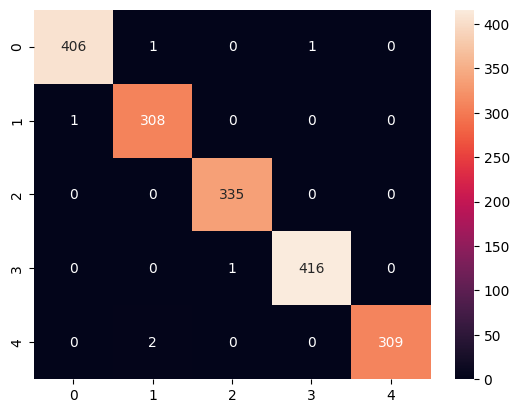

In [245]:
sns.heatmap(confusion_matrix(y_train,x_pred),annot=True,fmt='0.5g')

In [246]:
print(classification_report(y_train,x_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.99      1.00      0.99       309
           2       1.00      1.00      1.00       335
           3       1.00      1.00      1.00       417
           4       1.00      0.99      1.00       311

    accuracy                           1.00      1780
   macro avg       1.00      1.00      1.00      1780
weighted avg       1.00      1.00      1.00      1780



In [247]:
confusion_matrix(y_test,y_pred)

array([[85,  2,  5,  9,  1],
       [ 8, 61,  0,  4,  4],
       [ 4,  1, 66,  9,  2],
       [ 6,  6,  0, 80,  2],
       [ 8,  0,  0,  4, 78]])

<Axes: >

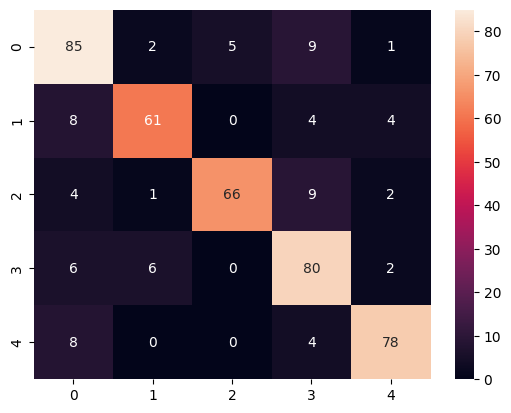

In [248]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.5g')

In [249]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       102
           1       0.87      0.79      0.83        77
           2       0.93      0.80      0.86        82
           3       0.75      0.85      0.80        94
           4       0.90      0.87      0.88        90

    accuracy                           0.83       445
   macro avg       0.84      0.83      0.83       445
weighted avg       0.84      0.83      0.83       445

